# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:**

* Machine Learning task: Classification model
* Target variable: Loan_Status
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [15]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [17]:
# check the number of rows and observations
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 614
Number of columns: 13


1    422
0    192
Name: Loan_Approved, dtype: int64


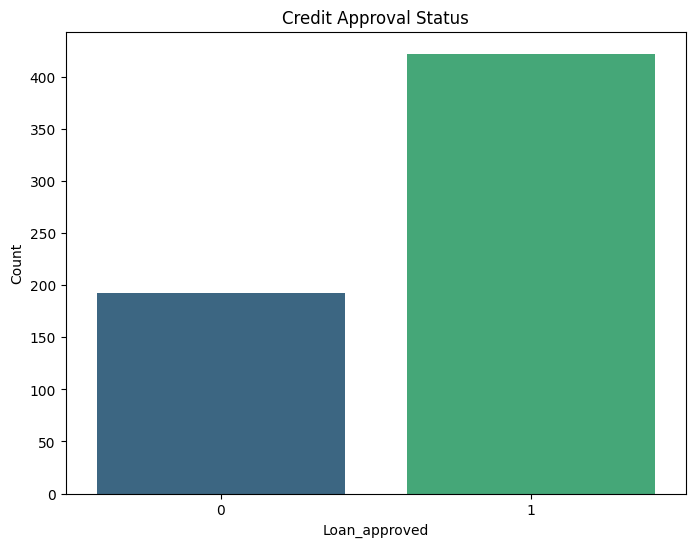

In [22]:
# How many application were approved and how many were denied? Plot a bar plot

Loan_Approved = df['Loan_Approved'].value_counts()

print(Loan_Approved)

plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Approved', data=df, palette='viridis')
plt.title('Credit Approval Status')
plt.xlabel('Loan_approved')
plt.ylabel('Count')
plt.show()

### Data Prep

In [23]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)

In [35]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns = [col for col in object_columns if col != 'Loan_Approved']

df = pd.get_dummies(df, columns=object_columns, drop_first=True)

In [36]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [37]:
# Seperate the input features and target variable

target_variable = 'Loan_Approved'

X = df.drop(target_variable, axis=1)
y = df[target_variable]

print("Input Features (X):")
print(X.head())

Input Features (X):
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0               1            1            0             0             0   
1               1            1            1             1             0   
2               1            1            1             0             0   
3               1            1            1             0             0   
4               1            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       

In [40]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 14)
X_test shape: (123, 14)
y_train shape: (491,)
y_test shape: (123,)


In [42]:
# check the split if interested

print("Sample rows from the training set:")
print(X_train.head())
print(y_train.head())

print("\nSample rows from the testing set:")
print(X_test.head())
print(y_test.head())

Sample rows from the training set:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
83              6000             2250.0         265               360   
90              2958             2900.0         131               360   
227             6250             1695.0         210               360   
482             2083             3150.0         128               360   
464             4166                0.0          98               360   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
83                1            1            1             0             0   
90                1            1            1             0             0   
227               1            1            1             0             1   
482               1            1            1             0             0   
464               0            1            0             0             0   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [43]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [45]:
# Fit the model on the data
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [46]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.
y_test_pred = logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.4f}")

Testing Accuracy: 0.7886


In [47]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[18 25]
 [ 1 79]]


In [58]:
# check how probabilities are assigned
y_test_probabilities = logreg_model.predict_proba(X_test)

print("Predicted Probabilities:")
print(y_test_probabilities)


Predicted Probabilities:
[[0.12297176 0.87702824]
 [0.10213633 0.89786367]
 [0.17287715 0.82712285]
 [0.2106497  0.7893503 ]
 [0.1298415  0.8701585 ]
 [0.29261607 0.70738393]
 [0.07788406 0.92211594]
 [0.16366222 0.83633778]
 [0.30222379 0.69777621]
 [0.28631631 0.71368369]
 [0.61463429 0.38536571]
 [0.22072772 0.77927228]
 [0.2207259  0.7792741 ]
 [0.25096333 0.74903667]
 [0.16039279 0.83960721]
 [0.16978063 0.83021937]
 [0.2339413  0.7660587 ]
 [0.1805129  0.8194871 ]
 [0.16971173 0.83028827]
 [0.04486176 0.95513824]
 [0.20022887 0.79977113]
 [0.1159973  0.8840027 ]
 [0.16818285 0.83181715]
 [0.17347251 0.82652749]
 [0.29804    0.70196   ]
 [0.33579689 0.66420311]
 [0.42475393 0.57524607]
 [0.1426804  0.8573196 ]
 [0.1168043  0.8831957 ]
 [0.07791124 0.92208876]
 [0.14345311 0.85654689]
 [0.10516719 0.89483281]
 [0.16773759 0.83226241]
 [0.28414275 0.71585725]
 [0.29004227 0.70995773]
 [0.90778376 0.09221624]
 [0.23028853 0.76971147]
 [0.17841619 0.82158381]
 [0.07943249 0.92056751]


In [55]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)

y_test_probabilities = logreg_model.predict_proba(X_test)

custom_threshold = 0.7

y_test_custom_threshold = (y_test_probabilities[:, 1] >= custom_threshold).astype(int)

print("Binary Predictions with Custom Threshold:")
print(y_test_custom_threshold)

Binary Predictions with Custom Threshold:
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 1 1]


## <font color='chocolate'>**2. Random Forest**

In [57]:
# Import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Let's list the tunable hyperparameters for Random Forest algorithm

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [60]:
# Fit a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")


Random Forest Testing Accuracy: 0.7805
